Install required dependancies

In [8]:
! pip install pandas matplotlib scikit-learn xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [11]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from xgboost import  XGBClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df=pd.read_csv("../hydropod_data.csv")
header = ['ph', 'temp', 'ec', 'water_level', 'condition']
df.columns=[header]
df["condition"]=df["condition"].astype(int)
df.head()

,ph,temp,ec,water_level,condition
0,6.14033,35.1875,0.00000,0,0
1,6.14033,35.1875,0.00000,0,0
2,6.14033,35.1875,0.00000,0,0
3,6.14033,34.9375,5.79448,0,0
4,6.12437,35.0000,5.75280,0,1


In [ ]:
x=df[df.columns[:-1]]
y=df[df.columns[-1]]

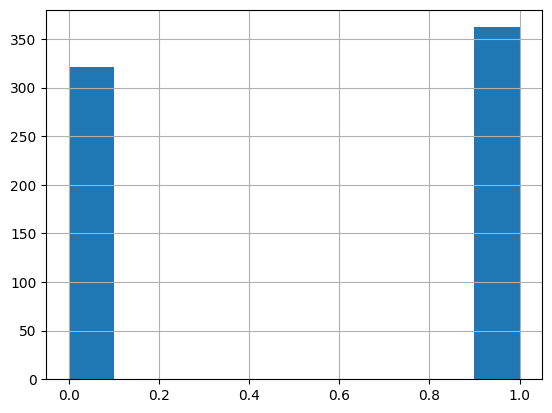

In [ ]:
y.hist()
plt.show()

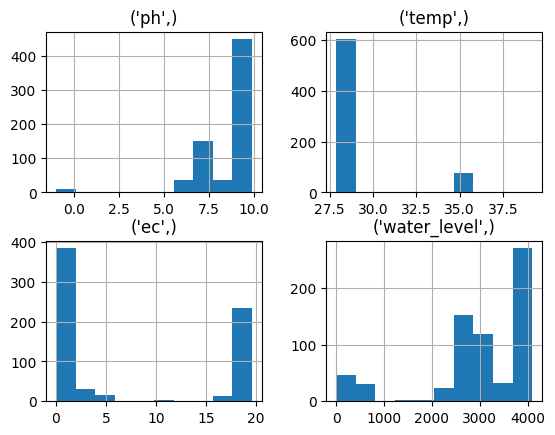

In [ ]:
x.hist()
plt.show()

In [ ]:
seed = 42
train_x, test_x, train_y, test_y = train_test_split(
    x, y, train_size=0.8, random_state=seed, stratify=y
)
model_res = [[], [], []]


SVM with linear Kernel

In [ ]:
svm=LinearSVC()
svm.fit(train_x,train_y)

c:\Users\rv1n\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
test_y_svm=svm.predict(test_x)
train_y_svm=svm.predict(train_x)
acc_test_svm=accuracy_score(test_y,test_y_svm)
acc_train_svm=accuracy_score(train_y,train_y_svm)
model_res[0].append("SVM")
model_res[1].append(acc_test_svm)
model_res[2].append(acc_train_svm)
acc_test_svm,acc_train_svm

(0.6131386861313869, 0.6227106227106227)

Using Xgboost

In [ ]:
xgb=XGBClassifier()
xgb.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
test_y_xgb=xgb.predict(test_x)
train_y_xgb=xgb.predict(train_x)   
acc_test_xgb = accuracy_score(test_y, test_y_xgb)
acc_train_xgb = accuracy_score(train_y, train_y_xgb)
model_res[0].append("XGB")
model_res[1].append(acc_test_xgb)
model_res[2].append(acc_train_xgb)
acc_test_xgb, acc_train_xgb

(0.9708029197080292, 1.0)

Using Neural Network

In [ ]:
mlp=MLPClassifier()
mlp.fit(train_x,train_y)

MLPClassifier()

In [ ]:
test_y_mlp = mlp.predict(test_x)
train_y_mlp = mlp.predict(train_x)
acc_test_mlp = accuracy_score(test_y, test_y_mlp)
acc_train_mlp = accuracy_score(train_y, train_y_mlp)
model_res[0].append("MLP")
model_res[1].append(acc_test_mlp)
model_res[2].append(acc_train_mlp)
acc_test_mlp, acc_train_mlp


(0.9854014598540146, 0.9835164835164835)

K-Nearest Neighbours Classifier

In [ ]:
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
test_y_knc=knc.predict(test_x)
train_y_knc=knc.predict(train_x)
acc_test_knc = accuracy_score(test_y, test_y_knc)
acc_train_knc = accuracy_score(train_y, train_y_knc)
model_res[0].append("KNC")
model_res[1].append(acc_test_knc)
model_res[2].append(acc_train_knc)
acc_test_knc, acc_train_knc

(0.9562043795620438, 0.9542124542124543)

In [ ]:
res=pd.DataFrame(data=np.transpose(model_res),columns=["Model","test accuracy","train accuracy"])
res.sort_values(by=["test accuracy","train accuracy"],ascending=False)

,Model,test accuracy,train accuracy
2,MLP,0.9854014598540146,0.9835164835164835
1,XGB,0.9708029197080292,1.0
3,KNC,0.9562043795620438,0.9542124542124543
0,SVM,0.6131386861313869,0.6227106227106227


In [ ]:
with open('hydropod_model.pkl','wb') as mod_file:
    pickle.dump(mlp,mod_file)